In [1]:
# Select inline for generating publication figures
%matplotlib inline

# Select notebook for interactive, clickable figures
#%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
from aisynphys.database import default_db as db
from aisynphys.cell_class import CellClass, classify_cells
from aisynphys.ui.notebook import compose_svg_figure

import aisynphys.synapse_types as synapse_types

In [3]:
query = synapse_types.synapse_query(db=db)
syn_data = synapse_types.load_data(query)

# Add some extra metrics
syn_data['psp_log_snr'] = np.log(np.abs(syn_data['pulse_amp_90th_percentile'] / syn_data['noise_amp_90th_percentile']))
syn_data['log_noise_std'] = np.log(np.abs(syn_data['noise_std']))

print(f"Loaded {len(syn_data)} synapses")

Loaded 2133 synapses


/home/luke/miniconda3/envs/dev3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
# label loaded data with custom subclasses
subclasses = {
    'Pvalb': {'cre_type': 'pvalb'},
    'Sst': {'cre_type': 'sst'},
    'Vip': {'cre_type': 'vip'},
    'L2/3E': {'species': 'mouse', 'layer': '2/3', 'cell_class': 'ex', 'cre_type': 'unknown'},
    'L4E': {'cre_type': ['rorb', 'nr5a1']},
    'L5ET': {'cre_type': ['fam84b', 'sim1']},
    'L5IT': {'cre_type': 'tlx3'},
    'L6CT': {'cre_type': 'ntsr1'},
    'h-L2e': {'species': 'human', 'layer': '2', 'cell_class': 'ex'},
    'h-L3e': {'species': 'human', 'layer': '3', 'cell_class': 'ex'},
    'h-L4e': {'species': 'human', 'layer': '4', 'cell_class': 'ex'},
    'h-L5e': {'species': 'human', 'layer': '5', 'cell_class': 'ex'},
    'h-L6e': {'species': 'human', 'layer': '5', 'cell_class': 'ex'},
    'h-inh': {'species': 'human', 'cell_class': 'in'},
}
labeled_syn_data = synapse_types.label_subclasses(syn_data, subclasses)
labeled_syn_data.head(20)

synapse_type pre_cre_type  \
experiment_ext_id pre_ext_id post_ext_id                             
1497300497.121    4          3                     ex         sim1   
1497653267.742    3          2                     ex         tlx3   
                             4                     ex         tlx3   
1497904429.959    7          6                     ex         rorb   
1497469151.704    8          1                     ex         sim1   
                  1          2                     ex         sim1   
                  8          5                     ex         sim1   
                  1          8                     ex         sim1   
1485298543.116    7          6                     ex         tlx3   
1485385860.089    2          1                     ex         tlx3   
1485818466.554    2          3                     ex         tlx3   
1485904693.103    8          2                     ex         tlx3   
                  1          2                     ex         tlx3   
                  7          5                     ex         tlx3   
1486511976.478    7          2                     ex         tlx3   
1486769398.428    8          7                     ex         tlx3   
1486753952.160    2          1                     in      unknown   
                  1          2                     in      unknown   
                  2          8                     in      unknown   
                  1          8                     in      unknown   

                                         post_cre_type pre_cell_class  \
experiment_ext_id pre_ext_id post_ext_id                                
1497300497.121    4          3                    sim1             ex   
1497653267.742    3          2                     sst             ex   
                             4                     sst             ex   
1497904429.959    7          6                 unknown             ex   
1497469151.704    8          1                    sim1             ex   
                  1          2                    sim1             ex   
                  8          5                    sim1             ex   
                  1          8                    sim1             ex   
1485298543.116    7          6                    tlx3             ex   
1485385860.089    2          1                    tlx3             ex   
1485818466.554    2          3                 unknown             ex   
1485904693.103    8          2                    tlx3             ex   
                  1          2                    tlx3             ex   
                  7          5                    tlx3             ex   
1486511976.478    7          2                     sst             ex   
1486769398.428    8          7                   pvalb             ex   
1486753952.160    2          1                 unknown             in   
                  1          2                 unknown             in   
                  2          8                 unknown             in   
                  1          8                 unknown             in   

                                         post_cell_class species pre_layer  \
experiment_ext_id pre_ext_id post_ext_id                                     
1497300497.121    4          3                        ex   mouse         5   
1497653267.742    3          2                        in   mouse         5   
                             4                        in   mouse         5   
1497904429.959    7          6                      None   mouse         4   
1497469151.704    8          1                        ex   mouse         5   
                  1          2                        ex   mouse         5   
                  8          5                        ex   mouse         5   
                  1          8                        ex   mouse         5   
1485298543.116    7          6                        ex   mouse         4   
1485385860.089    2          1     

In [5]:
feature_fields = [
#     'distance', 
     'psp_amplitude', 
     'psc_amplitude', 
     'psp_rise_time', 'psp_decay_tau', 
     'psc_rise_time', 'psc_decay_tau',
     'latency',
#     'paired_pulse_ratio_50hz',
     'stp_initial_50hz',
#     'stp_initial_50hz_n',
#     'stp_initial_50hz_std',
     'stp_induction_50hz',
#     'stp_induction_50hz_n',
#     'stp_induction_50hz_std',
     'stp_recovery_250ms',
#     'stp_recovery_250ms_n',
#     'stp_recovery_250ms_std',
     'stp_recovery_single_250ms',
#     'stp_recovery_single_250ms_n',
#     'stp_recovery_single_250ms_std',
     'pulse_amp_90th_percentile',
#     'noise_amp_90th_percentile',
#     'noise_std',
     'variability_resting_state',
#     'variability_second_pulse_50hz',
     'variability_stp_induced_state_50hz',
#     'variability_change_initial_50hz',
#     'variability_change_induction_50hz',
#     'paired_event_correlation_1_2_r',
#     'paired_event_correlation_1_2_p',
#     'paired_event_correlation_2_4_r',
#     'paired_event_correlation_2_4_p',
#     'paired_event_correlation_4_8_r',
#     'paired_event_correlation_4_8_p',
]

In [6]:
# count number of nans in each column, just so we know where all the data is going:
nans = [(syn_data[col].isna().sum(), col) for col in feature_fields]
for nn, col in sorted(nans)[::-1][:30]:
    print(f"{nn:4d}  {col}")

1037  variability_stp_induced_state_50hz
1027  variability_resting_state
 830  psc_amplitude
 793  stp_recovery_250ms
 786  stp_recovery_single_250ms
 765  stp_induction_50hz
 759  stp_initial_50hz
 723  psp_amplitude
 707  pulse_amp_90th_percentile
 657  psc_rise_time
 657  psc_decay_tau
 514  psp_rise_time
 514  psp_decay_tau
 451  latency


In [7]:
# create sklearn pipeline for normalization + umap reduction
mapper = synapse_types.umap_pipeline(
    n_components=2,
    n_neighbors=15,
    min_dist=0.8,
    random_state=0,
)

umap_data = synapse_types.run_umap_pipeline(labeled_syn_data, mapper, feature_fields)
umap_data

Dropped to 717 synapses


/home/luke/miniconda3/envs/dev3/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


synapse_type pre_cre_type  \
experiment_ext_id pre_ext_id post_ext_id                             
1497653267.742    3          4                     ex         tlx3   
1497469151.704    8          5                     ex         sim1   
1485904693.103    8          2                     ex         tlx3   
1486511976.478    7          2                     ex         tlx3   
1487017853.791    8          2                     ex      unknown   
...                                               ...          ...   
1498516798.238    5          2                     in      unknown   
1487107236.822    7          5                     ex         sim1   
1532552839.296    5          2                     in        pvalb   
1496781774.056    7          6                     ex         rorb   
1522789170.885    5          8                     in      unknown   

                                         post_cre_type pre_cell_class  \
experiment_ext_id pre_ext_id post_ext_id                                
1497653267.742    3          4                     sst             ex   
1497469151.704    8          5                    sim1             ex   
1485904693.103    8          2                    tlx3             ex   
1486511976.478    7          2                     sst             ex   
1487017853.791    8          2                     sst             ex   
...                                                ...            ...   
1498516798.238    5          2                    rorb             in   
1487107236.822    7          5                    sim1             ex   
1532552839.296    5          2                 unknown             in   
1496781774.056    7          6                 unknown             ex   
1522789170.885    5          8                 unknown             in   

                                         post_cell_class species pre_layer  \
experiment_ext_id pre_ext_id post_ext_id                                     
1497653267.742    3          4                        in   mouse         5   
1497469151.704    8          5                        ex   mouse         5   
1485904693.103    8          2                        ex   mouse         4   
1486511976.478    7          2                        in   mouse         5   
1487017853.791    8          2                        in   mouse         5   
...                                                  ...     ...       ...   
1498516798.238    5          2                        ex   mouse      None   
1487107236.822    7          5                        ex   mouse      None   
1532552839.296    5          2                      None   mouse      None   
1496781774.056    7          6                        in   mouse      None   
1522789170.885    5          8                        ex   mouse      None   

                                         post_layer  distance  \
experiment_ext_id pre_ext_id post_ext_id                        
1497653267.742    3          4                    5  0.000063   
1497469151.704    8          5                    5  0.000069   
1485904693.103    8          2                    4  0.000095   
1486511976.478    7          2                    5  0.000065   
1487017853.791    8          2                    5  0.000114   
...                                             ...       ...   
1498516798.238    5          2                 None  0.000078   
1487107236.822    7          5                 None  0.000092   
1532552839.296    5          2                 None  0.000106   
1496781774.056    7          6                 None  0.000117   
1522789170.885    5          8                 None  0.000147   

                                          n_ex_test_spikes  ...  \
experiment_ext_id pre_ext_id post_ext_id                    ...   
1497653267.742    3          4                         621  ...   
1497469151.704    8          5                         550  ...   
1485904693.103    8          2                     

<AxesSubplot:xlabel='umap-0', ylabel='umap-1'>

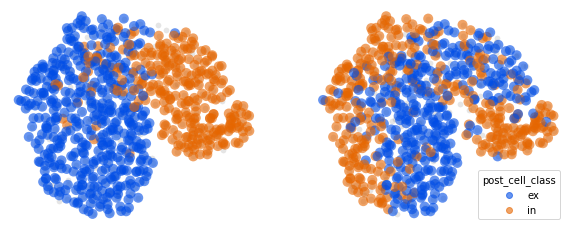

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

class_colors = {
    'ex': (0, .3, .9, .6),
    'in': (.9, .4, 0, .6),
}

synapse_types.show_umap(umap_data, s=100, hue='pre_cell_class', palette=class_colors, linewidth=0, ax=ax[0])
synapse_types.show_umap(umap_data, s=100, hue='post_cell_class', palette=class_colors, linewidth=0, ax=ax[1], 
    legend=True, legend_title="cell class")

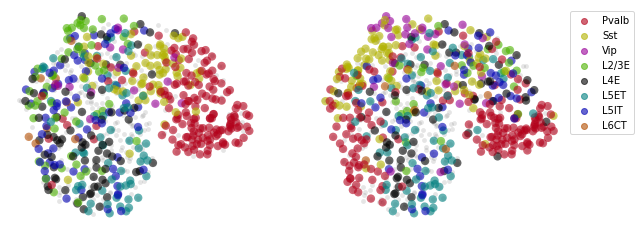

In [9]:
alpha = 0.6
subclass_palette = {
    'Pvalb': (0.7, 0.0, 0.1, alpha),
    'Sst':   (0.7, 0.7, 0.0, alpha),
    'Vip':   (0.6, 0.0, 0.6, alpha),
    'L2/3E': (0.3, 0.7, 0.0, alpha),
    'L4E':   (0.0, 0.0, 0.0, alpha),
    'L5ET':  (0.0, 0.5, 0.5, alpha),
    'L5IT':  (0.0, 0.0, 0.7, alpha),
    'L6CT':  (0.7, 0.3, 0.0, alpha),
}

fig_a, ax = plt.subplots(1, 2, figsize=(10, 4))
synapse_types.show_umap(umap_data, s=70, hue='pre_subclass', palette=subclass_palette, ax=ax[0])
synapse_types.show_umap(umap_data, s=70, hue='post_subclass', palette=subclass_palette, ax=ax[1], legend=True)

ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

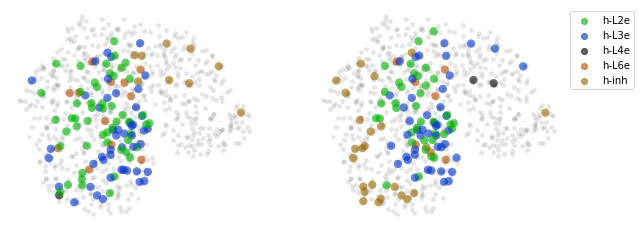

In [10]:
alpha = 0.6
subclass_palette = {
    'h-L2e': (0.0, 0.7, 0.0, alpha),
    'h-L3e': (0.0, 0.2, 0.8, alpha),
    'h-L4e': (0.0, 0.0, 0.0, alpha),
    'h-L6e': (0.7, 0.3, 0.0, alpha),
    'h-inh': (0.6, 0.4, 0.0, alpha),
}
fig_b, ax = plt.subplots(1, 2, figsize=(10, 4))
synapse_types.show_umap(umap_data, s=70, hue='pre_subclass', palette=subclass_palette, ax=ax[0])
synapse_types.show_umap(umap_data, s=70, hue='post_subclass', palette=subclass_palette, ax=ax[1], legend=True)

ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

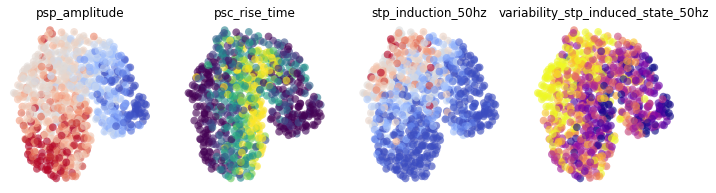

In [11]:
plot_fields = [
    {'hue': 'psp_amplitude', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-1e-3, 1e-3)},
    {'hue': 'psc_rise_time', 'palette': 'viridis', 'hue_norm': matplotlib.colors.LogNorm(1e-3, 3e-3)},
    {'hue': 'stp_induction_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'variability_stp_induced_state_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1)},
]
fig_c, ax = plt.subplots(1, len(plot_fields), figsize=(3*len(plot_fields), 3), squeeze=False)
for i,opts in enumerate(plot_fields):
    synapse_types.show_umap(umap_data, s=60, alpha=0.6, ax=ax[0, i], **opts)
    ax[0, i].set_title(opts['hue'])



In [12]:
# Load stochastic model reduction
model_data = synapse_types.load_model_vectors(db)

# join with synapse/cell data
syn_data_with_model = labeled_syn_data.join(model_data)

model_data.head()

/home/luke/miniconda3/envs/dev3/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator MiniBatchSparsePCA from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


PC_0        PC_1        PC_2  \
experiment_ext_id pre_ext_id post_ext_id                                        
1622154777.410    2          4             576.397642  317.688796   62.026507   
1629493850.447    2          8            3380.593957  415.437148 -108.520346   
1539293313.543    1          7            1845.775174  408.606440  -42.608797   
1622148959.864    7          2            -734.842065  464.633032  237.198725   
1581375129.740    2          1            1712.667343   56.302586 -114.649884   

                                                PC_3        PC_4        PC_5  \
experiment_ext_id pre_ext_id post_ext_id                                       
1622154777.410    2          4           -150.163795  -36.617360   42.224571   
1629493850.447    2          8           -807.340684 -231.654766  199.706423   
1539293313.543    1          7           -678.563088  -94.862946  117.750654   
1622148959.864    7          2             59.902341   73.251897  -20.695548   
1581375129.740    2          1           -479.659696 -102.677627  134.960381   

                                                PC_6       PC_7        PC_8  \
experiment_ext_id pre_ext_id post_ext_id                                      
1622154777.410    2          4             15.878658  20.079853   -3.458946   
1629493850.447    2          8           -175.766988 -93.996003 -169.350735   
1539293313.543    1          7           -104.301847 -69.048597 -104.774646   
1622148959.864    7          2            177.415457  32.282083  109.162393   
1581375129.740    2          1           -133.093667 -44.786282 -126.228722   

                                                PC_9  ...       PC_40  \
experiment_ext_id pre_ext_id post_ext_id              ...               
1622154777.410    2          4             25.110099  ...  130.587923   
1629493850.447    2          8            172.264213  ...  704.317667   
1539293313.543    1          7            120.333821  ...  302.540593   
1622148959.864    7          2           -181.082736  ... -286.570978   
1581375129.740    2          1            136.389569  ...  387.254040   

                                               PC_41      PC_42       PC_43  \
experiment_ext_id pre_ext_id post_ext_id                                      
1622154777.410    2          4              2.261813  11.280958   20.147566   
1629493850.447    2          8            111.647081  44.548093 -288.742409   
1539293313.543    1          7             69.421184  53.695355 -166.789632   
1622148959.864    7          2            -40.936694 -35.018121  120.973244   
1581375129.740    2          1             70.692832  46.526454 -205.353085   

                                               PC_44       PC_45       PC_46  \
experiment_ext_id pre_ext_id post_ext_id                                       
1622154777.410    2          4            -74.014992 -114.140139  158.092030   
1629493850.447    2          8           -134.503296 -406.111691   85.331572   
1539293313.543    1          7            128.882366  -85.551391 -128.720087   
1622148959.864    7          2             17.026611   42.121434  -10.296408   
1581375129.740    2          1             67.716982 -122.322531  -67.084340   

                                              PC_47       PC_48      PC_49  
experiment_ext_id pre_ext_id post_ext_id                                    
1622154777.410    2          4            44.611938  124.023902   3.499068  
1629493850.447    2          8           -59.686379 -713.019347  48.574891  
1539293313.543    1          7           -31.397952  -38.590230  26.541088  
1622148959.864    7          2            42.724773  -72.626789 -24.125578  
1581375129.740    2          1           -30.443567 -147.688027  31.403432  

[5 rows x 50 columns]

In [13]:
# create sklearn pipeline for normalization + umap reduction
mapper2 = synapse_types.umap_pipeline(
    n_components=2,
    n_neighbors=20,
    min_dist=1,
    random_state=0,
)

# filter out weakest synapses
#mask = mask | (syn_data['psp_log_snr'] < 1)
mask = abs(syn_data_with_model['pulse_amp_90th_percentile']) < 200e-6
mask |= syn_data_with_model['n_model_source_events'] < 100

filtered_data = syn_data_with_model.loc[~mask]

umap_data2 = synapse_types.run_umap_pipeline(filtered_data, mapper2, model_data.columns)

Dropped to 1196 synapses


In [14]:
print("Human synapses:", (umap_data2['species'] == 'human').sum())
print("Mouse synapses:", (umap_data2['species'] == 'mouse').sum())

Human synapses: 161
Mouse synapses: 1035


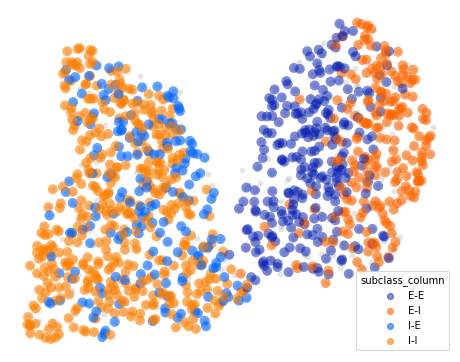

In [15]:
fig_a, ax = plt.subplots(1, 1, figsize=(8, 6.4))

class_colors = {
    'E-E': (0, .1, .7, .5),
    'E-I': (1, .4, 0, .6),
    'I-E': (0, .4, 1, .6),
    'I-I': (1, .5, 0, .6),
}
class_criteria = {
    'E-E': {'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
    'E-I': {'pre_cell_class': 'ex', 'post_cell_class': 'in'},
    'I-E': {'pre_cell_class': 'in', 'post_cell_class': 'ex'},
    'I-I': {'pre_cell_class': 'in', 'post_cell_class': 'in'},
}

synapse_types.show_subclass_umap(umap_data2, class_criteria, class_colors, ax, s=100, legend=True, legend_title='')

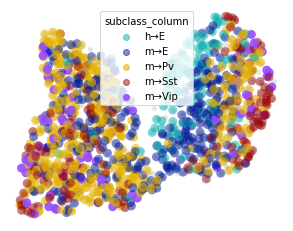

In [16]:
fig_b, ax = plt.subplots(1, 1, figsize=(5, 4))

class_colors = {
    'h→E': (0, .7, .7, .5),
    'm→E': (0, .1, .6, .5),
    'm→Pv': (.9, .7, 0, .6),
    'm→Sst': (.6, 0, 0, .5),
    'm→Vip': (.6, .3, 1, .9),
}
class_criteria = {
    'h→E': {'species': 'human', 'post_cell_class': 'ex'},
    'm→E': {'species': 'mouse', 'post_cell_class': 'ex'},
    'm→Pv': {'species': 'mouse', 'post_cre_type': 'pvalb'},
    'm→Sst': {'species': 'mouse', 'post_cre_type': 'sst'},
    'm→Vip': {'species': 'mouse', 'post_cre_type': 'vip'},
}

synapse_types.show_subclass_umap(umap_data2, class_criteria, class_colors, ax, s=80, legend=True, legend_title='')

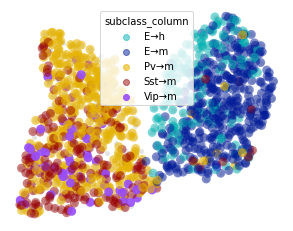

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

class_colors = {
    'E→h': (0, .7, .7, .5),
    'E→m': (0, .1, .6, .5),
    'Pv→m': (.9, .7, 0, .6),
    'Sst→m': (.6, 0, 0, .5),
    'Vip→m': (.6, .3, 1, .9),
}
class_criteria = {
    'E→h': {'species': 'human', 'pre_cell_class': 'ex'},
    'E→m': {'species': 'mouse', 'pre_cell_class': 'ex'},
    'Pv→m': {'species': 'mouse', 'pre_cre_type': 'pvalb'},
    'Sst→m': {'species': 'mouse', 'pre_cre_type': 'sst'},
    'Vip→m': {'species': 'mouse', 'pre_cre_type': 'vip'},
}

synapse_types.show_subclass_umap(umap_data2, class_criteria, class_colors, ax, s=80, legend=True, legend_title='')

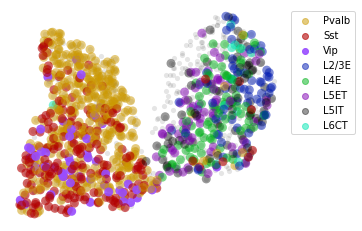

In [18]:
# alternate coloring for fig c that divides up excitatory subclasses
# (there are slight differences between the subclasses, but too much information in one plot)
alpha = 0.6
subclass_palette = {
    'Pvalb': (.8, .6, 0, .5),
    'Sst':   (.7, 0, 0, .6),
    'Vip':   (.6, .3, 1, .9),
    'L2/3E': (0, .1, .7, .5),
    'L4E':   (0, .7, .1, .5),
    'L5ET':  (.5, .0, .7, .5),
    'L5IT':  (0, 0, 0, .4),
    'L6CT':  (0, .9, .7, .5),
#     'h-L2e': (.9, 0, .9, .6),
#     'h-L3e': (.9, .6, 0, .6),
}

fig_c, ax = plt.subplots(figsize=(5, 4))
synapse_types.show_umap(umap_data2, s=80, hue='pre_subclass', palette=subclass_palette, ax=ax, legend=True)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

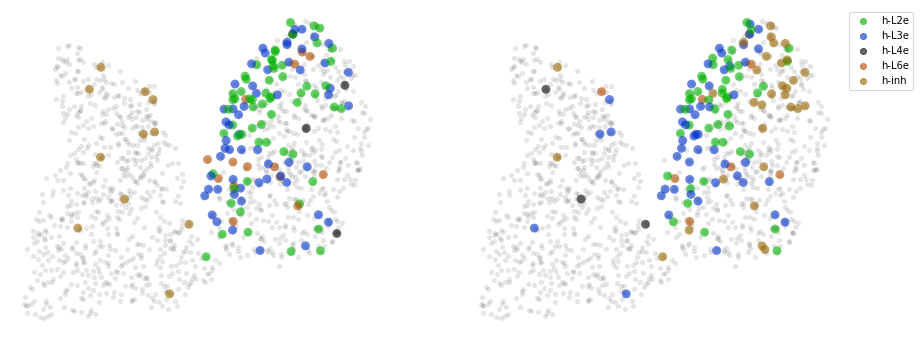

In [19]:
# looking at just human types
alpha = 0.6
subclass_palette = {
    'h-L2e': (0.0, 0.7, 0.0, alpha),
    'h-L3e': (0.0, 0.2, 0.8, alpha),
    'h-L4e': (0.0, 0.0, 0.0, alpha),
    'h-L6e': (0.7, 0.3, 0.0, alpha),
    'h-inh': (0.6, 0.4, 0.0, alpha),
}
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
synapse_types.show_umap(umap_data2, s=80, hue='pre_subclass', palette=subclass_palette, ax=ax[0])
synapse_types.show_umap(umap_data2, s=80, hue='post_subclass', palette=subclass_palette, ax=ax[1], legend=True)

ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

In [20]:
# and just mouse E types

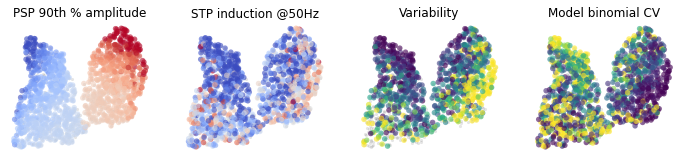

In [43]:
plot_fields = [
    {'hue': 'pulse_amp_90th_percentile', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-1.5e-3, 1.5e-3)},
    {'hue': 'stp_induction_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'variability_resting_state', 'palette': 'viridis', 'hue_norm': plt.Normalize(-1.5, 1)},
    {'hue': 'ml_quanta_per_spike', 'palette': 'viridis', 'hue_norm': plt.Normalize(0.1, 10)},
]
titles = ['PSP 90th % amplitude', 'STP induction @50Hz', 'Variability', 'Model binomial CV']
fig_d, ax = plt.subplots(1, len(plot_fields), figsize=(3*len(plot_fields), 3*4/5), squeeze=False)
for i,opts in enumerate(plot_fields):
    synapse_types.show_umap(umap_data2, s=30, alpha=0.6, ax=ax[0, i], **opts)
    ax[0, i].set_title(titles[i])


In [44]:
label_opts = {'size': '16pt', 'font': 'arial', 'weight': 'bold'}

figure_spec = [
    {'figure': fig_a, 'pos': (110, 20), 'label': 'A', 'label_opts': label_opts},
    {'figure': fig_b, 'pos': (40, 360), 'label': 'B', 'label_opts': label_opts},
    {'figure': fig_c, 'pos': (330, 360), 'label': 'C', 'label_opts': label_opts},
    {'figure': fig_d, 'pos': (0, 600), 'label': 'D', 'label_opts': label_opts},
]

compose_svg_figure(
    figure_spec, 
    size=('7.5in', '8in'), 
    filename=os.path.join('generated_svg', 'figure_6.svg'), 
    display=True
)

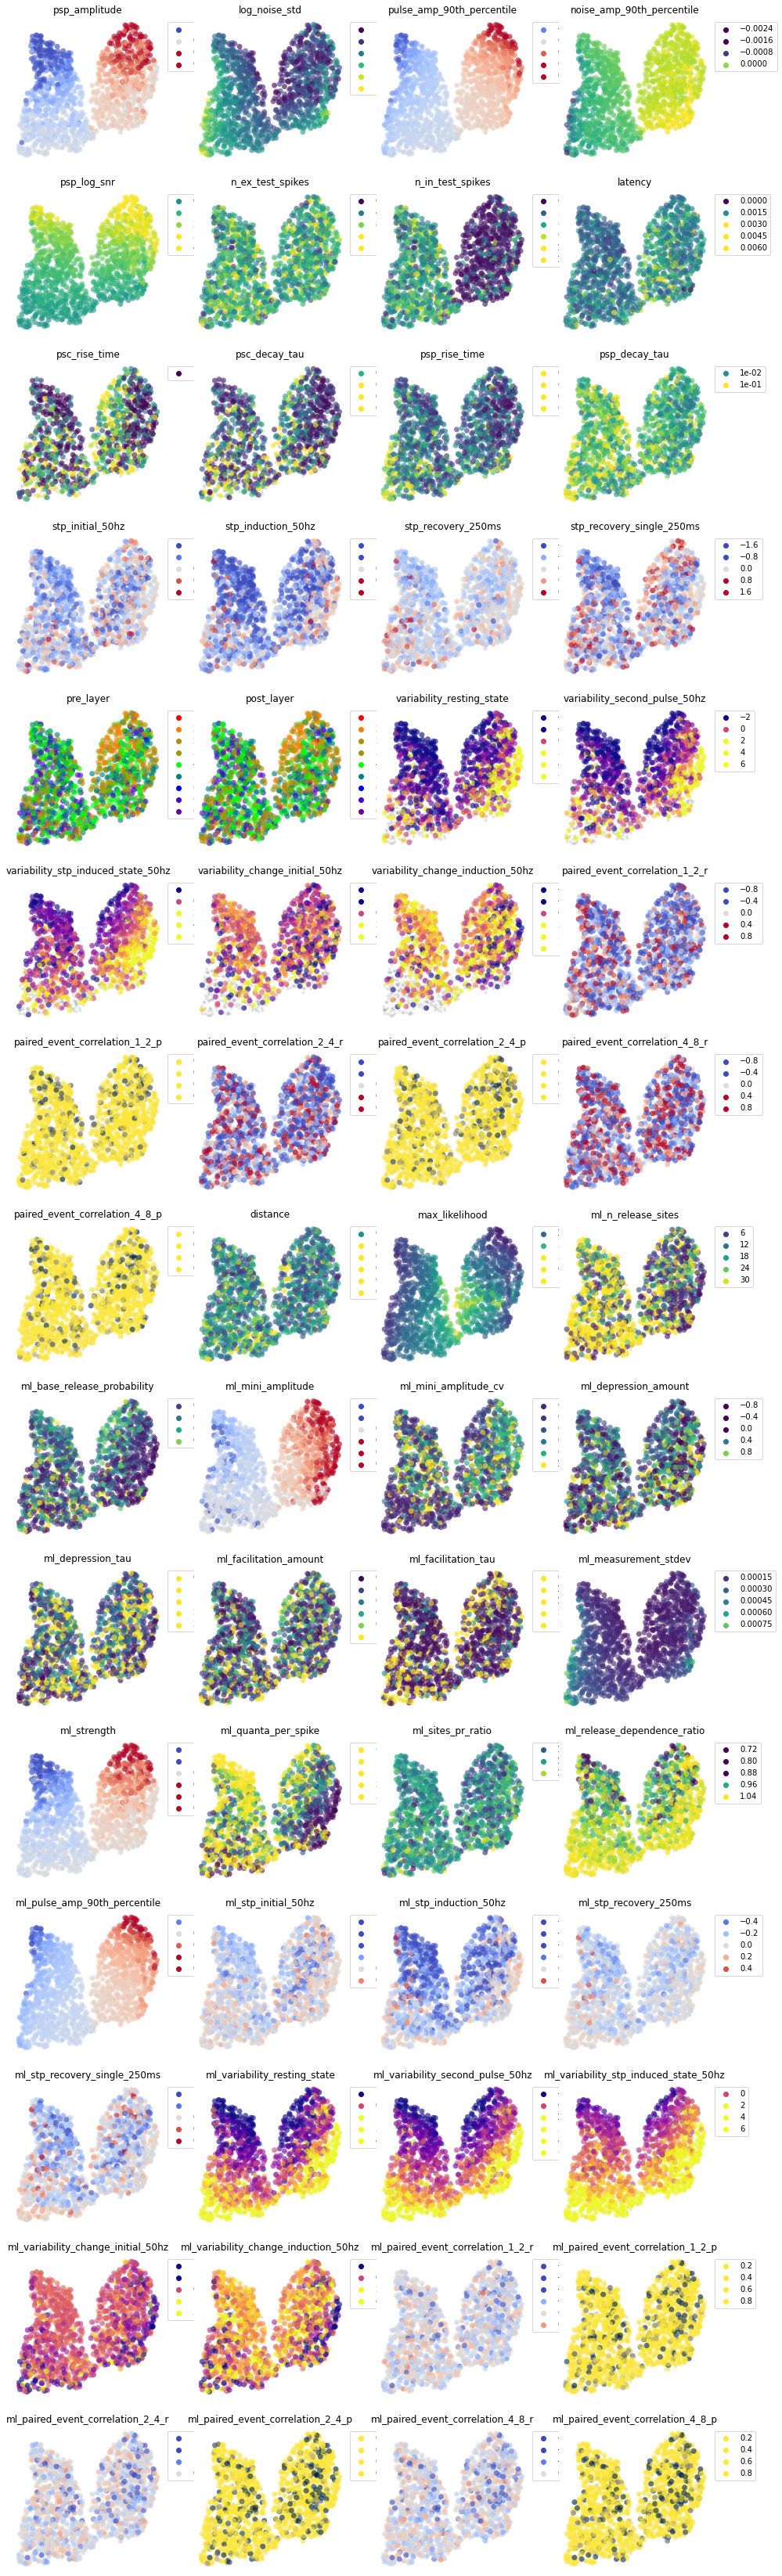

In [23]:
layer_colors = {
    '1': (1, 0, 0), 
    '2': (1, 0.5, 0), 
    '2/3': (0.7, 0.55, 0),
    '3': (0.6, 0.6, 0),
    '4': (0, 1, 0), 
    '5': (0, 0.5, 0.5), 
    '6': (0, 0, 1), 
    '6a': (0.3, 0, 0.8), 
    '6b': (0.4, 0, 0.6)
}
plot_fields = [
    {'hue': 'psp_amplitude', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-1e-3, 1e-3)},
    {'hue': 'log_noise_std', 'palette': 'viridis', 'hue_norm': plt.Normalize(-10, -7)},
    {'hue': 'pulse_amp_90th_percentile', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-2e-3, 2e-3)},
    {'hue': 'noise_amp_90th_percentile', 'palette': 'viridis', 'hue_norm': plt.Normalize(-1e-3, 0.2e-3)},
    {'hue': 'psp_log_snr', 'palette': 'viridis', 'hue_norm': plt.Normalize(-3, 3)},
    {'hue': 'n_ex_test_spikes', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1000)},
    {'hue': 'n_in_test_spikes', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1000)},
    {'hue': 'latency', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 3e-3)},
    {'hue': 'psc_rise_time', 'palette': 'viridis', 'hue_norm': matplotlib.colors.LogNorm(1e-3, 3e-3)},
    {'hue': 'psc_decay_tau', 'palette': 'viridis', 'hue_norm': plt.Normalize(1e-3, 12e-3)},
    {'hue': 'psp_rise_time', 'palette': 'viridis', 'hue_norm': plt.Normalize(1e-3, 10e-3)},
    {'hue': 'psp_decay_tau', 'palette': 'viridis', 'hue_norm': matplotlib.colors.LogNorm(1e-3, 100e-3)},
    {'hue': 'stp_initial_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'stp_induction_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'stp_recovery_250ms', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'stp_recovery_single_250ms', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'pre_layer', 'palette': layer_colors},# 'hue_norm': plt.Normalize(-1, 1)},
    {'hue': 'post_layer', 'palette': layer_colors},# 'hue_norm': plt.Normalize(-1, 1)},
    {'hue': 'variability_resting_state', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'variability_second_pulse_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'variability_stp_induced_state_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'variability_change_initial_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'variability_change_induction_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'paired_event_correlation_1_2_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'paired_event_correlation_1_2_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    {'hue': 'paired_event_correlation_2_4_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'paired_event_correlation_2_4_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    {'hue': 'paired_event_correlation_4_8_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'paired_event_correlation_4_8_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    {'hue': 'distance', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 200e-6)},


    # metrics derived from model output
    {'hue': 'max_likelihood', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 3000)},
    {'hue': 'ml_n_release_sites', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 32)},
    {'hue': 'ml_base_release_probability', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1)},
    {'hue': 'ml_mini_amplitude', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-0.4e-3, 0.4e-3)},
    {'hue': 'ml_mini_amplitude_cv', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1)},
    {'hue': 'ml_depression_amount', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1)},
    {'hue': 'ml_depression_tau', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 500e-3)},
    {'hue': 'ml_facilitation_amount', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1)},
    {'hue': 'ml_facilitation_tau', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 500e-3)},
    {'hue': 'ml_measurement_stdev', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 1e-3)},
    {'hue': 'ml_strength', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-1e-3, 1e-3)},
    {'hue': 'ml_quanta_per_spike', 'palette': 'viridis', 'hue_norm': plt.Normalize(0, 5)},
    {'hue': 'ml_sites_pr_ratio', 'palette': 'viridis', 'hue_norm': matplotlib.colors.LogNorm()},
    {'hue': 'ml_release_dependence_ratio', 'palette': 'viridis', 'hue_norm': plt.Normalize(.9, 1.0)},

    # dynamics features derived from simulated events
    {'hue': 'ml_pulse_amp_90th_percentile', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-2e-3, 2e-3)},
    {'hue': 'ml_stp_initial_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'ml_stp_induction_50hz', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'ml_stp_recovery_250ms', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'ml_stp_recovery_single_250ms', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.5, .5)},
    {'hue': 'ml_variability_resting_state', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'ml_variability_second_pulse_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'ml_variability_stp_induced_state_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'ml_variability_change_initial_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'ml_variability_change_induction_50hz', 'palette': 'plasma', 'hue_norm': plt.Normalize(-1, 1), 'legend': 'auto'},
    {'hue': 'ml_paired_event_correlation_1_2_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'ml_paired_event_correlation_1_2_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    {'hue': 'ml_paired_event_correlation_2_4_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'ml_paired_event_correlation_2_4_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    {'hue': 'ml_paired_event_correlation_4_8_r', 'palette': 'coolwarm', 'hue_norm': plt.Normalize(-.2, .2)},
    {'hue': 'ml_paired_event_correlation_4_8_p', 'palette': 'cividis', 'hue_norm': plt.Normalize(0, .1)},
    
]

cols = 4
rows = int(np.ceil(len(plot_fields) / cols))

fig, ax = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
for row in range(rows):
    for col in range(cols):
        i = col + row * cols
        if i < len(plot_fields):
            opts = plot_fields[i]
            opts.setdefault('legend', True)
            synapse_types.show_umap(umap_data2, s=50, alpha=0.6, ax=ax[row, col], **opts)
            ax[row, col].legend(loc='upper left', bbox_to_anchor=(1.0, 1))
            ax[row, col].set_title(opts['hue'])
        else:
            ax[row, col].axes.xaxis.set_visible(False)
            ax[row, col].axes.yaxis.set_visible(False)



Verification of things learned above: which features contain the most information about cell type?

In [24]:
import sklearn.linear_model, sklearn.pipeline, sklearn.ensemble, sklearn.feature_selection, sklearn.model_selection
import seaborn
import pandas

In [25]:
sklearn.__version__

'1.0.1'

In [26]:
features = np.array([
    col for col in filtered_data.columns 
    if pd.api.types.is_numeric_dtype(filtered_data[col].dtype)
    and not col.startswith('PC')
    and not col.startswith('n_')
    and not col.endswith('_n')
    and not col.endswith('_std')  # mostly just overlap with variability measurements?
])

In [27]:
kinetic_features = np.array([
    'psp_rise_time',
    'psp_decay_tau',
    'psc_rise_time',
    'psc_decay_tau',
    'latency',
])

engr_features = np.array([
    'distance',
    'psp_amplitude',
    'psc_amplitude',
    'paired_pulse_ratio_50hz',
    'stp_initial_50hz',
    'stp_induction_50hz',
    'stp_recovery_250ms',
    'stp_recovery_single_250ms',
    'pulse_amp_90th_percentile',
    'noise_amp_90th_percentile',
    'variability_resting_state',
    'variability_second_pulse_50hz',
    'variability_stp_induced_state_50hz',
    'variability_change_initial_50hz',
    'variability_change_induction_50hz',
    'paired_event_correlation_1_2_r',
    'paired_event_correlation_1_2_p',
    'paired_event_correlation_2_4_r',
    'paired_event_correlation_2_4_p',
    'paired_event_correlation_4_8_r',
    'paired_event_correlation_4_8_p',
])
    
model_ml_features = np.array([
#     'max_likelihood',
    'ml_n_release_sites',
    'ml_base_release_probability',
    'ml_mini_amplitude',
    'ml_mini_amplitude_cv',
    'ml_depression_amount',
    'ml_depression_tau',
    'ml_facilitation_amount',
    'ml_facilitation_tau',
    'ml_measurement_stdev',
    'ml_strength',
    'ml_quanta_per_spike',
    'ml_sites_pr_ratio',
    'ml_release_dependence_ratio',
    'ml_paired_pulse_ratio_50hz',
    'ml_stp_initial_50hz',
    'ml_stp_induction_50hz',
    'ml_stp_recovery_250ms',
    'ml_stp_recovery_single_250ms',
    'ml_pulse_amp_90th_percentile',
    'ml_noise_amp_90th_percentile',
    'ml_variability_resting_state',
    'ml_variability_second_pulse_50hz',
    'ml_variability_stp_induced_state_50hz',
    'ml_variability_change_initial_50hz',
    'ml_variability_change_induction_50hz',
#     'ml_paired_event_correlation_1_2_r',
#     'ml_paired_event_correlation_1_2_p',
#     'ml_paired_event_correlation_2_4_r',
#     'ml_paired_event_correlation_2_4_p',
#     'ml_paired_event_correlation_4_8_r',
#     'ml_paired_event_correlation_4_8_p',
])


In [28]:
# Select model ML features for further analysis.
features = model_ml_features
# features = np.concatenate([kinetic_features, model_ml_features])


nan_mask = filtered_data[features].isna().any(axis=1)
ex_mask = filtered_data['synapse_type'] == 'ex'
in_mask = filtered_data['synapse_type'] == 'in'

ex_data = filtered_data.loc[ex_mask & ~nan_mask].copy()
in_data = filtered_data.loc[in_mask & ~nan_mask].copy()
all_data = filtered_data.loc[~nan_mask].copy()

print(" ex conections:", len(ex_data))
print(" in conections:", len(in_data))
print("all conections:", len(all_data))


 ex conections: 540
 in conections: 621
all conections: 1161


In [48]:
import os
from aisynphys.ui.progressbar import ProgressBar
import scipy.stats
import concurrent.futures


def plot_axis_combos(data, axes, hues, **kwds):
    fig, ax = plt.subplots(len(axes), len(hues), figsize=(12, 16))
    for i, hue in enumerate(hues):
        for j in range(len(axes)):
            x = axes[j]
            y = axes[(j + 1) % len(axes)]
            seaborn.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax[j, i], **kwds)
    fig.tight_layout()
    

def median_mutual_info(x, y, iter=40, **kwds):
    mi = [
        sklearn.feature_selection.mutual_info_classif(x, y, **kwds)
        for i in range(iter)
    ]
    return np.median(np.stack(mi), axis=0)    
    
def norm_mutual_info_classif(x, y, **kwds):
    norm_kwds = {k:kwds[k] for k in ['random_state', 'n_neighbors'] if k in kwds}
    norm_kwds['discrete_features'] = True
    y_numeric = sklearn.preprocessing.LabelEncoder().fit_transform(y)
    norm = median_mutual_info(pandas.DataFrame({'class': y_numeric}), y, **norm_kwds)
    mi = median_mutual_info(x, y, **kwds)
    nmi = mi / norm
    assert np.all(np.isfinite(nmi))
    return nmi, mi, norm


class DummyExecutor:
    def submit(self, func, *args, **kwds):
        return Job(func, *args, **kwds)

    def __enter__(self):
        return self
    
    def __exit__(self, *args):
        pass
    
class Job:
    def __init__(self, func, *args, **kwds):
        self.func = func
        self.args = args
        self.kwds = kwds
        
    def result(self):
        return self.func(*self.args, **self.kwds)



def mi_classif_shuffle(data, features, target_class_column, n_shuffles=1000, bootstrap_frac=0.5, parallel=True):
    """Calculate mutual information between *features* and *classes*, and compare to shuffled. 
    
    Return a DataFrame with columns:
    - feature : string feature name
    - mutual_info : mutual information between *feature* and target class
    - pval : fraction of shuffled MI vlues larger than *mutual_info*
    - bootstrap : array containing bootstrapped MI values
    - shuffled : array containing MI values calculated on class-shuffled data
    """
    feature_data = data[features]
    class_data = data[target_class_column]
    
    normed_mutual_info, mutual_info, mi_norm = norm_mutual_info_classif(feature_data, class_data)
    bootstrap_mutual_info = np.empty((len(mutual_info), n_shuffles))
    shuffled_mutual_info = np.empty((len(mutual_info), n_shuffles))
    
    with DummyExecutor() if not parallel else concurrent.futures.ProcessPoolExecutor(os.cpu_count()) as executor:
        futures = []
        for i in range(n_shuffles):
            sample = data.sample(frac=bootstrap_frac)
            futures.append(executor.submit(
                sklearn.feature_selection.mutual_info_classif, 
                sample[features], 
                sample[target_class_column],
            ))
    
        with ProgressBar('Bootstrapping mutual information', maximum=n_shuffles-1) as prg:
            for i,f in enumerate(futures):
                bootstrap_mutual_info[:,i] = f.result()
                prg.update(i, f'{i} / {n_shuffles}')
        
        futures = []
        for i in range(n_shuffles):
            futures.append(executor.submit(
                sklearn.feature_selection.mutual_info_classif, 
                feature_data, 
                class_data.sample(frac=1)
            ))
    
        with ProgressBar('Calculating shuffled mutual information', maximum=n_shuffles-1) as prg:
            for i,f in enumerate(futures):
                shuffled_mutual_info[:,i] = f.result()
                prg.update(i, f'{i} / {n_shuffles}')
                
    pvals = np.array([
        1 - 0.01 * scipy.stats.percentileofscore(shuffled_mutual_info[i], mutual_info[i]) 
        for i in range(len(mutual_info))
    ])
    
    df = pandas.DataFrame({
        'feature': features, 
        'mutual_info': mutual_info, 
        'mi_lower_ci': scipy.stats.scoreatpercentile(bootstrap_mutual_info, 5, axis=1),
        'mi_upper_ci': scipy.stats.scoreatpercentile(bootstrap_mutual_info, 95, axis=1),
        'normed_mutual_info': normed_mutual_info,
#         'mi_norm': mi_norm,
        'pval': pvals, 
        'shuffled': list(shuffled_mutual_info),
        'bootstrap': list(bootstrap_mutual_info),
    })
    return df.sort_values('mutual_info', ascending=False).reset_index(drop=True)
    

def per_feature_regression_accuracy(model, data, features, target_class_column, n_fold=5, n_shuffles=100):
    """Test model accuracy for features individualy to determine relative 
    importance in classification.
    """
    results = {}
    y = data[target_class_column].to_numpy()
    with ProgressBar('Calculating shuffled accuracy', maximum=len(features)-1) as prg:
        for feature_i, feature in enumerate(features):
            X = data[[feature]].to_numpy()
            acc = model_accuracy(model, X, y, n_fold=n_fold)

            shuf_acc = []

            for i in range(n_shuffles):
                y_shuf = data[target_class_column].sample(frac=1).to_numpy()
                shuf_acc.append(np.mean(model_accuracy(model, X, y_shuf, n_fold=n_fold)['test_accuracy']))

            test_acc = acc['test_accuracy']
            mean_accuracy = np.mean(test_acc)
            mean_shuffled_accuracy = np.mean(shuf_acc)
            adj_accuracy = (mean_accuracy - mean_shuffled_accuracy) / (1 - mean_shuffled_accuracy)
            results[feature] = {
                'accuracy': acc,
                'adj_accuracy': adj_accuracy,
                'pval': 1.0 - 0.01 * scipy.stats.percentileofscore(shuf_acc, mean_accuracy),
            }

            prg.update(feature_i, f'{feature_i} / {len(features)-1}')
            
    return results
    
    
def model_accuracy(model, X, y, n_fold=5):
    """Train *model* using stratified k-fold cross validation, return training and
    test accuracy values for each fold.
    """    
    train_accuracy = []
    test_accuracy = []
#     roc_auc_scores = []

    # build pipeline with normalization
    pipeline = sklearn.pipeline.Pipeline([
        ('scaler', sklearn.preprocessing.StandardScaler()),
        ('model', model),
    ])

    cv = sklearn.model_selection.StratifiedKFold(n_splits=n_fold, shuffle=True)
    for train_ind, test_ind in cv.split(X, y):
        X_train, X_test = X[train_ind], X[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]

        # fit model
        pipeline.fit(X_train, y_train)

        # make prediction and split again into train/test sets
        pred_train = pipeline.predict(X_train)
        pred_test = pipeline.predict(X_test)

        train_accuracy.append((pred_train == y_train).sum() / len(y_train))
        test_accuracy.append((pred_test == y_test).sum() / len(y_test))
        
#         if len(test_y.unique()) == 2:
#             roc_auc = sklearn.metrics.roc_auc_score(
#                 test_y, 
#                 pipeline.predict_proba(test_data[features])[:, 1],
#             )
#         else:
#             roc_auc = sklearn.metrics.roc_auc_score(
#                 test_y, 
#                 pipeline.predict_proba(test_data[features]), 
#                 multi_class='ovr',
#             )
#         roc_auc_scores.append(roc_auc)
    return {
        'train_accuracy': train_accuracy, 
        'test_accuracy': test_accuracy,
    }

    
    
def test_model(model, data, all_features, select_n_features, target_class_column, n_fold=5, plot=True, plot_kwds=None):
    """Train classification *model* using *select_n_features* features with highest
    mutual information to target classes.
    
    Repeat *n_fold* times selecting random subsets tor training / testing each time.
    
    Scatter plot pairs of features colored by predicted class (left) and actual class (right).
    """
    # Select N features that have highest mutual information with target
    mi_df = mi_classif_shuffle(data, all_features, target_class_column)
    
    per_feature_acc = per_feature_regression_accuracy(model, data, all_features, target_class_column, n_fold=n_fold)
    mi_df['adj_accuracy'] = [per_feature_acc[feature]['adj_accuracy'] for feature in mi_df['feature']]
    mi_df['adj_accuracy_p'] = [per_feature_acc[feature]['pval'] for feature in mi_df['feature']]
    mi_df = mi_df.sort_values('adj_accuracy', ascending=False).reset_index(drop=True)
    
    features = mi_df['feature'].to_numpy()[:select_n_features]
#     features = all_features[:select_n_features]

    X = data[features].to_numpy()
    y = data[target_class_column].to_numpy()
    y_shuf = data[target_class_column].sample(frac=1).to_numpy()
    

    model_acc = model_accuracy(model, X, y)
    shuffled_acc = model_accuracy(model, X, y_shuf)
    
    train_accuracy = model_acc['train_accuracy']
    test_accuracy = model_acc['test_accuracy']
    shuffled_accuracy = shuffled_acc['test_accuracy']
        
    train_accuracy = np.mean(train_accuracy)
    test_accuracy = np.mean(test_accuracy)
    shuffled_accuracy = np.mean(shuffled_accuracy)
    adjusted_accuracy = (np.mean(test_accuracy)-np.mean(shuffled_accuracy)) / (1 - np.mean(shuffled_accuracy))
    print(f"Training accuracy: {train_accuracy:0.2f}±{np.std(train_accuracy):0.2f}")
    print(f"Test accuracy:     {test_accuracy:0.2f}±{np.std(test_accuracy):0.2f}")
    print(f"Shuffled accuracy: {shuffled_accuracy:0.2f}±{np.std(test_accuracy):0.2f}")
#     print(f"ROC AUC score:     {np.mean(roc_auc_scores):0.2f}±{np.std(roc_auc_scores):0.2f}")
    
    print(f"Adjusted accuracy: {adjusted_accuracy:0.2f}")
    feature_len = max([len(f) for f in mi_df['feature']])
    fmt = "{feature:%ds} {mi:0.02f} [{lower:0.02f}-{upper:0.02f}] {pval:0.03f} {adj_acc:0.02f}  {adj_acc_pval:0.02f}" % feature_len
    print(f"feature{' '*(feature_len-7)} m.i. [ 95% CI  ] pval  adj.acc. pval")
    for i in range(len(mi_df)):
        row = mi_df.iloc[i]
        feature = row['feature']
        print(fmt.format(
            feature=feature, 
            mi=row['mutual_info'], 
            lower=row['mi_lower_ci'], 
            upper=row['mi_upper_ci'],
            pval=row['pval'],
            adj_acc=per_feature_acc[feature]['adj_accuracy'],
            adj_acc_pval=per_feature_acc[feature]['pval'],
        ))
    print("MI total:", mi_df['mutual_info'].sum())
    
    if plot:
        plot_kwds = plot_kwds or {}
        plot_axis_combos(data, features[:4], hues=['prediction', target_class_column], **plot_kwds)
        
    return {
        'features': mi_df, 
        'train_accuracy': train_accuracy, 
        'test_accuracy': test_accuracy, 
        'shuffled_accuracy': shuffled_accuracy,
        'adjusted_accuracy': adjusted_accuracy,
    }


def test_model_on_class_criteria(model, data, features, select_n_features, class_criteria, **kwds):
    data2 = synapse_types.label_rows(data, class_criteria, new_column='subclass_column').dropna(subset=['subclass_column'])
    return test_model(model, data2, features, select_n_features, 'subclass_column', **kwds)


What factors influence E/I clustering? Is it purely based on amplitude?

In [49]:

def cell_class_mutual_info(data, features, class_criteria):
    data2 = synapse_types.label_rows(data, class_criteria, new_column='subclass_column').dropna(subset=['subclass_column'])
    mi_df = mi_classif_shuffle(data2, features, 'subclass_column', n_shuffles=1000, bootstrap_frac=0.8)
    return mi_df



#### Predicting E vs I synapses from ML model properties

Excitatory and inhibitory clusters clearly separate based on synaptic strength, but do any other synapse properties play a role here? This classifier (unsurprisingly) achieves 100% test accuracy almost entirely using synaptic strength. Other features such as measurement_stdev, n_release_sites, and quanta_per_spike may play a smaller role.

In [50]:
class_criteria = {
    'E': {'pre_cell_class': 'ex'},
    'I': {'pre_cell_class': 'in'},
}

model = sklearn.linear_model.LogisticRegression(max_iter=300)
result = test_model_on_class_criteria(model, all_data, features, 15, class_criteria, plot=False)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 1.00±0.00
Test accuracy:     1.00±0.00
Shuffled accuracy: 0.54±0.00
Adjusted accuracy: 1.00
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_pulse_amp_90th_percentile          0.69 [0.69-0.69] 0.000 1.00  0.00
ml_strength                           0.69 [0.68-0.69] 0.000 0.99  0.00
ml_mini_amplitude                     0.68 [0.68-0.69] 0.000 0.92  0.00
ml_measurement_stdev                  0.14 [0.10-0.17] 0.000 0.35  0.00
ml_n_release_sites                    0.07 [0.04-0.11] 0.000 0.27  0.00
ml_quanta_per_spike                   0.11 [0.06-0.13] 0.000 0.25  0.00
ml_variability_change_initial_50hz    0.03 [0.00-0.06] 0.036 0.06  0.00
ml_variability_resting_state          0.00 [0.00-0.04] 0.757 0.05  0.00
ml_mini_amplitude_cv                  0.04 [0.01-0.08] 0.004 0.04  0.01
ml_base_release_probability           0.02 [0.00-0.05] 0.124 0.04  0.00
ml_depression_amount  

#### Predicting postsynaptic E/I class in excitatory connections

Excitatory synapses clearly split by postsynaptic E/I class:

In [55]:
class_criteria = {
    'E→E': {'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
    'E→I': {'pre_cell_class': 'ex', 'post_cell_class': 'in'},
}

model = sklearn.linear_model.LogisticRegression(max_iter=300)
e_to_ei_result = test_model_on_class_criteria(model, all_data, features, 15, class_criteria, plot=False)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.86±0.00
Test accuracy:     0.83±0.00
Shuffled accuracy: 0.53±0.00
Adjusted accuracy: 0.64
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_mini_amplitude                     0.19 [0.14-0.25] 0.000 0.47  0.00
ml_variability_resting_state          0.12 [0.08-0.19] 0.000 0.32  0.00
ml_quanta_per_spike                   0.13 [0.06-0.16] 0.000 0.30  0.00
ml_stp_induction_50hz                 0.07 [0.01-0.12] 0.001 0.27  0.00
ml_variability_change_induction_50hz  0.05 [0.01-0.11] 0.009 0.26  0.00
ml_base_release_probability           0.10 [0.05-0.15] 0.000 0.26  0.00
ml_variability_stp_induced_state_50hz 0.06 [0.01-0.11] 0.006 0.26  0.00
ml_variability_second_pulse_50hz      0.10 [0.06-0.17] 0.000 0.25  0.00
ml_paired_pulse_ratio_50hz            0.04 [0.01-0.11] 0.050 0.24  0.00
ml_pulse_amp_90th_percentile          0.05 [0.01-0.11] 0.013 0.19  0.00
ml_facilitation_amount

#### Predicting postsynaptic E/I class in inhibitory connections

Inhibitory synapse strength and dynamics are largely independent of postsynaptic E/I class:

In [56]:
class_criteria = {
    'I→E': {'pre_cell_class': 'in', 'post_cell_class': 'ex'},
    'I→I': {'pre_cell_class': 'in', 'post_cell_class': 'in'},
}


model = sklearn.linear_model.LogisticRegression(max_iter=300)
i_to_ei_result = test_model_on_class_criteria(model, all_data, features, 15, class_criteria, plot=False)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.75±0.00
Test accuracy:     0.73±0.00
Shuffled accuracy: 0.70±0.00
Adjusted accuracy: 0.09
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_measurement_stdev                  0.03 [0.00-0.08] 0.063 0.04  0.00
ml_mini_amplitude                     0.01 [0.00-0.06] 0.264 0.00  0.36
ml_depression_tau                     0.00 [0.00-0.04] 0.450 0.00  0.45
ml_sites_pr_ratio                     0.01 [0.00-0.05] 0.339 0.00  0.39
ml_variability_change_initial_50hz    0.00 [0.00-0.06] 0.428 0.00  0.02
ml_pulse_amp_90th_percentile          0.02 [0.00-0.05] 0.196 0.00  0.47
ml_variability_second_pulse_50hz      0.00 [0.00-0.04] 0.738 0.00  0.46
ml_variability_stp_induced_state_50hz 0.03 [0.00-0.05] 0.041 0.00  0.45
ml_release_dependence_ratio           0.00 [0.00-0.04] 0.750 0.00  0.46
ml_variability_resting_state          0.02 [0.00-0.05] 0.196 0.00  0.48
ml_strength           

#### Predicting postsynaptic subclass (E, Pvalb, Sst, Vip) in mouse excitatory connections 

In [57]:
e_to_isub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'mE→E': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
        'mE→Pv': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'pvalb'},
        'mE→Sst': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'sst'},
        'mE→Vip': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'vip'},
    },
    plot=False
)    

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.76±0.00
Test accuracy:     0.72±0.00
Shuffled accuracy: 0.47±0.00
Adjusted accuracy: 0.47
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_mini_amplitude                     0.38 [0.29-0.46] 0.000 0.34  0.00
ml_variability_resting_state          0.25 [0.19-0.36] 0.000 0.24  0.00
ml_variability_second_pulse_50hz      0.21 [0.14-0.31] 0.000 0.23  0.00
ml_quanta_per_spike                   0.29 [0.18-0.35] 0.000 0.23  0.00
ml_variability_change_induction_50hz  0.21 [0.13-0.30] 0.000 0.18  0.00
ml_paired_pulse_ratio_50hz            0.13 [0.06-0.22] 0.000 0.18  0.00
ml_stp_induction_50hz                 0.19 [0.14-0.30] 0.000 0.16  0.00
ml_base_release_probability           0.16 [0.10-0.25] 0.000 0.13  0.00
ml_variability_stp_induced_state_50hz 0.07 [0.01-0.15] 0.017 0.11  0.00
ml_stp_recovery_250ms                 0.11 [0.08-0.21] 0.000 0.11  0.00
ml_variability_change_

#### Predicting postsynaptic subclass (E, Pvalb, Sst, Vip) in inhibitory connections

In [58]:
i_to_isub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
    #     'hE→E': {'species': 'human', 'pre_cell_class': 'in', 'post_cell_class': 'ex'},
        'mE→E': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cell_class': 'ex'},
        'mE→Pv': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'pvalb'},
        'mE→Sst': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'sst'},
        'mE→Vip': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'vip'},
    },
    plot=False
)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.59±0.00
Test accuracy:     0.57±0.00
Shuffled accuracy: 0.47±0.00
Adjusted accuracy: 0.19
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_stp_induction_50hz                 0.19 [0.12-0.24] 0.000 0.07  0.00
ml_measurement_stdev                  0.03 [0.00-0.09] 0.089 0.05  0.00
ml_variability_change_induction_50hz  0.09 [0.06-0.17] 0.000 0.04  0.00
ml_stp_recovery_250ms                 0.12 [0.03-0.15] 0.000 0.04  0.00
ml_variability_change_initial_50hz    0.09 [0.04-0.16] 0.000 0.03  0.00
ml_stp_recovery_single_250ms          0.06 [0.02-0.12] 0.009 0.02  0.00
ml_depression_tau                     0.07 [0.01-0.12] 0.005 0.00  0.43
ml_sites_pr_ratio                     0.06 [0.01-0.11] 0.007 0.00  0.69
ml_strength                           0.09 [0.02-0.13] 0.000 0.00  0.43
ml_pulse_amp_90th_percentile          0.04 [0.00-0.07] 0.071 0.00  0.49
ml_depression_amount  

#### Predicting species in E-E connections

In [59]:
ee_species_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'hE→E': {'species': 'human', 'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
        'mE→E': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
    },
    plot=False
)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.79±0.00
Test accuracy:     0.76±0.00
Shuffled accuracy: 0.56±0.00
Adjusted accuracy: 0.45
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_facilitation_tau                   0.08 [0.01-0.16] 0.003 0.26  0.00
ml_stp_recovery_single_250ms          0.09 [0.03-0.17] 0.002 0.26  0.00
ml_variability_second_pulse_50hz      0.05 [0.00-0.11] 0.062 0.21  0.00
ml_variability_stp_induced_state_50hz 0.11 [0.03-0.17] 0.000 0.21  0.00
ml_paired_pulse_ratio_50hz            0.08 [0.00-0.12] 0.003 0.15  0.00
ml_stp_recovery_250ms                 0.02 [0.00-0.11] 0.209 0.09  0.00
ml_pulse_amp_90th_percentile          0.02 [0.00-0.08] 0.226 0.08  0.00
ml_mini_amplitude                     0.01 [0.00-0.09] 0.355 0.03  0.02
ml_variability_resting_state          0.03 [0.00-0.08] 0.143 0.02  0.02
ml_depression_amount                  0.04 [0.00-0.11] 0.091 0.01  0.42
ml_depression_tau     

#### Predicting excitatory postsynaptic subclass in mouse excitatory connections

In [60]:
e_to_esub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'L2/3E→': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_subclass': 'L2/3E'},
        'L4E→':  {'species': 'mouse', 'pre_cell_class': 'ex', 'post_subclass': 'L4E'},
        'L5ET→': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_subclass': 'L5ET'},
        'L5IT→': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_subclass': 'L5IT'},
        'L6CT→': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_subclass': 'L6CT'},
    },
    plot=False
)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.55±0.00
Test accuracy:     0.42±0.00
Shuffled accuracy: 0.36±0.00
Adjusted accuracy: 0.09
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_mini_amplitude                     0.02 [0.00-0.13] 0.289 0.10  0.00
ml_quanta_per_spike                   0.01 [0.00-0.10] 0.391 0.07  0.01
ml_pulse_amp_90th_percentile          0.07 [0.00-0.13] 0.068 0.03  0.02
ml_depression_amount                  0.00 [0.00-0.16] 0.744 0.02  0.35
ml_stp_initial_50hz                   0.01 [0.00-0.12] 0.353 0.02  0.31
ml_paired_pulse_ratio_50hz            0.00 [0.00-0.10] 0.752 0.01  0.33
ml_mini_amplitude_cv                  0.00 [0.00-0.13] 0.752 0.01  0.35
ml_facilitation_tau                   0.04 [0.00-0.16] 0.197 0.01  0.34
ml_depression_tau                     0.02 [0.00-0.15] 0.367 0.01  0.33
ml_strength                           0.00 [0.00-0.03] 0.738 0.01  0.43
ml_variability_change_

#### Predicting excitatory postsynaptic subclass in mouse inhibitory connections

In [61]:
i_to_esub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'L2/3E→': {'species': 'mouse', 'pre_cell_class': 'in', 'post_subclass': 'L2/3E'},
        'L4E→':  {'species': 'mouse', 'pre_cell_class': 'in', 'post_subclass': 'L4E'},
        'L5ET→': {'species': 'mouse', 'pre_cell_class': 'in', 'post_subclass': 'L5ET'},
        'L5IT→': {'species': 'mouse', 'pre_cell_class': 'in', 'post_subclass': 'L5IT'},
        'L6CT→': {'species': 'mouse', 'pre_cell_class': 'in', 'post_subclass': 'L6CT'},
    },
    plot=False
)

Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.49±0.00
Test accuracy:     0.30±0.00
Shuffled accuracy: 0.26±0.00
Adjusted accuracy: 0.05
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_pulse_amp_90th_percentile          0.09 [0.00-0.16] 0.038 0.04  0.06
ml_measurement_stdev                  0.00 [0.00-0.11] 0.742 0.03  0.15
ml_mini_amplitude_cv                  0.02 [0.00-0.19] 0.357 0.03  0.07
ml_facilitation_amount                0.06 [0.00-0.17] 0.105 0.02  0.19
ml_n_release_sites                    0.04 [0.00-0.33] 0.238 0.02  0.21
ml_variability_second_pulse_50hz      0.00 [0.00-0.02] 0.738 0.01  0.27
ml_mini_amplitude                     0.07 [0.00-0.18] 0.090 0.01  0.21
ml_variability_stp_induced_state_50hz 0.00 [0.00-0.08] 0.729 0.01  0.31
ml_stp_initial_50hz                   0.07 [0.00-0.16] 0.097 0.01  0.33
ml_variability_resting_state          0.00 [0.00-0.06] 0.743 0.00  0.42
ml_variability_change_

#### Predicting presynaptic subclass in excitatory connections

In [62]:
esub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'L2/3E→': {'species': 'mouse', 'pre_subclass': 'L2/3E'},
        'L4E→': {'species': 'mouse', 'pre_subclass': 'L4E'},
        'L5ET→': {'species': 'mouse', 'pre_subclass': 'L5ET'},
        'L5IT→': {'species': 'mouse', 'pre_subclass': 'L5IT'},
        'L6CT→': {'species': 'mouse', 'pre_subclass': 'L6CT'},
    },
    plot=False
)


Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.48±0.00
Test accuracy:     0.39±0.00
Shuffled accuracy: 0.25±0.00
Adjusted accuracy: 0.19
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_mini_amplitude                     0.17 [0.07-0.26] 0.000 0.19  0.00
ml_stp_initial_50hz                   0.04 [0.00-0.15] 0.113 0.15  0.00
ml_stp_recovery_single_250ms          0.15 [0.06-0.22] 0.000 0.13  0.00
ml_stp_induction_50hz                 0.10 [0.04-0.20] 0.005 0.10  0.00
ml_depression_tau                     0.06 [0.00-0.19] 0.049 0.10  0.00
ml_pulse_amp_90th_percentile          0.10 [0.01-0.18] 0.006 0.09  0.00
ml_quanta_per_spike                   0.08 [0.00-0.16] 0.023 0.08  0.00
ml_variability_change_induction_50hz  0.08 [0.00-0.14] 0.019 0.07  0.00
ml_variability_change_initial_50hz    0.04 [0.00-0.11] 0.123 0.07  0.00
ml_stp_recovery_250ms                 0.12 [0.02-0.19] 0.000 0.06  0.02
ml_variability_resting

#### Predicting presynaptic subclass in inhibitory connections

In [63]:
isub_result = test_model_on_class_criteria(
    model=sklearn.linear_model.LogisticRegression(max_iter=300), 
    data=all_data, 
    features=features, 
    select_n_features=15, 
    class_criteria={
        'mPv→': {'species': 'mouse', 'pre_subclass': 'Pvalb'},
        'mSst→': {'species': 'mouse', 'pre_subclass': 'Sst'},
        'mVip→': {'species': 'mouse', 'pre_subclass': 'Vip'},
    },
    plot=False
)


Calculating shuffled accuracy
  [####################]  24 / 24
  done.
Training accuracy: 0.76±0.00
Test accuracy:     0.74±0.00
Shuffled accuracy: 0.56±0.00
Adjusted accuracy: 0.41
feature                               m.i. [ 95% CI  ] pval  adj.acc. pval
ml_stp_recovery_single_250ms          0.23 [0.19-0.30] 0.000 0.34  0.00
ml_stp_recovery_250ms                 0.22 [0.17-0.27] 0.000 0.32  0.00
ml_stp_induction_50hz                 0.26 [0.20-0.31] 0.000 0.32  0.00
ml_variability_change_induction_50hz  0.13 [0.10-0.20] 0.000 0.23  0.00
ml_variability_second_pulse_50hz      0.10 [0.07-0.18] 0.000 0.22  0.00
ml_variability_resting_state          0.19 [0.12-0.23] 0.000 0.20  0.00
ml_paired_pulse_ratio_50hz            0.11 [0.07-0.17] 0.000 0.20  0.00
ml_facilitation_tau                   0.07 [0.02-0.11] 0.002 0.20  0.00
ml_strength                           0.13 [0.07-0.18] 0.000 0.19  0.00
ml_stp_initial_50hz                   0.10 [0.05-0.15] 0.000 0.14  0.00
ml_variability_change_

In [130]:
results = [
    (e_to_ei_result, 'excitatory', 'E/I classes'),
    (i_to_ei_result, 'inhibitory', 'E/I classes'),
    
    (e_to_isub_result, 'excitatory', 'E,Pvalb,Sst,Vip'),
    (i_to_isub_result, 'inhibitory', 'E,Pvalb,Sst,Vip'),

    (e_to_esub_result, 'excitatory', 'E subclasses'),
    (i_to_esub_result, 'inhibitory', 'E subclasses'),
    
    (esub_result, 'E&nbsp;subclasses', 'all'),
    (isub_result, 'Pvalb,Sst,Vip', 'all'),
    
    (ee_species_result, 'excitatory', 'human,mouse E'),
]


def cell(text, color=None, align='center'):
    style = ['padding-left: 5px', 'padding-right: 5px', f'text-align: {align}']
    if color is not None:
        hexcolor = ''.join([f'{int(c*255):02x}' for c in color])
        if np.sum(color) < 2.5:
            style.append('color: #CCC')
        style.append(f'background-color: #{hexcolor}')
    if len(style) == 0:
        style = ''
    else:
        style_str = ' '.join([f'{s};' for s in style])
        style = f' style="{style_str}"'

    return f"<td{style}>{text}</td>"


def row(first, values, fmt='%0.2f', cmap=None, style=''):
    cells = [cell(f'<b>{first}</b>', align='right')]
    for x in values:
        xstr = fmt % x
        color = cmap(x) if cmap is not None else None
        cells.append(cell(xstr, color=color))
    return [f'<tr style="background-color: #FFF; {style}">'] + cells + ['</tr>']


def plasma(x):
    return plt.cm.plasma(x / 0.7)


    

rows = []
rows.append(['<tr style="background-color: #FFF;">', cell("<b>presynaptic</b>", align='right')] + [cell(result[1]) for result in results] + ['</tr>'])
rows.append(['<tr style="border-bottom: 4px solid #AAA;">', cell("<b>postsynaptic</b>", align='right')] + [cell(result[2]) for result in results] + ['</tr>'])
rows.append(row("test accuracy", [result[0]['test_accuracy'] for result in results]))
rows.append(row("shuffled accuracy", [result[0]['shuffled_accuracy'] for result in results]))
rows.append(row("accuracy gain", [result[0]['adjusted_accuracy'] for result in results], cmap=plasma, style="border-bottom: 4px solid #AAA;"))

features = results[0][0]['features']['feature']
acc_values = np.empty((len(features), len(results)))
for i, result in enumerate(results):
    result = result[0]['features']
    result = result.set_index('feature')
    acc = result.loc[features]['adj_accuracy']
    acc_values[:, i] = acc

feature_order = np.argsort(acc_values.mean(axis=1))[::-1]
features = [features[i]for i in feature_order]
acc_values = acc_values[feature_order]
    
for i, feature in enumerate(features):
    feature = feature[3:]  # strip off the "ml_"
    rows.append(row(feature, acc_values[i], cmap=plasma))
    
html_table = '<table style="border-collapse: collapse; font-family: sans-serif;">\n'
for row in rows:
    html_table += "".join(row) + "\n"
html_table += "</table>"

# print(html_table)
from IPython.display import HTML, display
display(HTML(html_table))
open(os.path.join('generated_svg', 'figure_s13.html'), 'w').write(html_table)

# plt.table(
#     cell_text,
#     cell_color,
# #     col_widths=[],
# )

35953

Let's look more closely at this relationship between variability, STP, and postsynaptic subclass. 

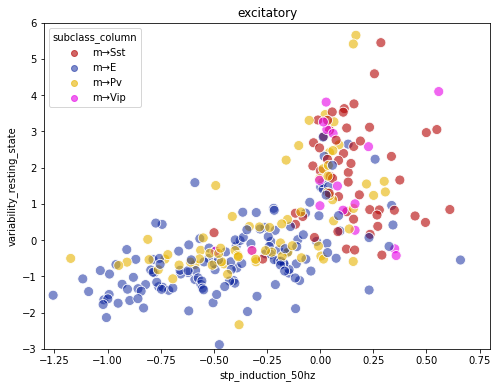

In [41]:
# Directly plot amplitude vs variability to see if we get similar results wrt. postsynaptic type 

class_colors = {
    'h→E': (0, .7, .7, .5),
    'm→E': (0, .1, .6, .5),
    'm→Pv': (.9, .7, 0, .6),
    'm→Sst': (.7, 0, 0, .6),
    'm→Vip': (.9, 0, .9, .6),
}
class_criteria = {
#     'h→E': {'species': 'human', 'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
    'm→E': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cell_class': 'ex'},
    'm→Pv': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'pvalb'},
    'm→Sst': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'sst'},
    'm→Vip': {'species': 'mouse', 'pre_cell_class': 'ex', 'post_cre_type': 'vip'},
}

data2 = synapse_types.label_rows(umap_data2, class_criteria, new_column='subclass_column')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.set_xscale('log')
ax.set_xlim(-1.3, 0.8)
ax.set_ylim(-3, 6)
ax.set_title('excitatory')
sns.scatterplot(
    data=data2, ax=ax,
#     x='pulse_amp_90th_percentile', 
    x='stp_induction_50hz', 
    y='variability_resting_state', 
    hue="subclass_column", palette=class_colors,
    s=100,
);


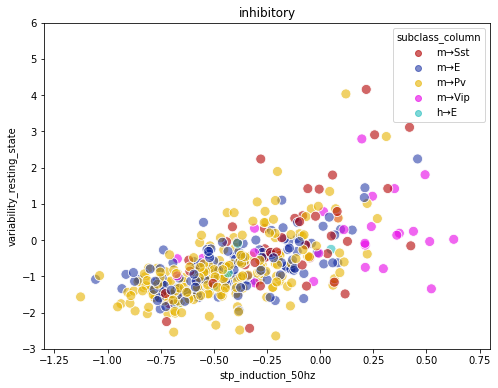

In [42]:
# Directly plot amplitude vs variability to see if we get similar results wrt. postsynaptic type 

class_colors = {
    'h→E': (0, .7, .7, .5),
    'm→E': (0, .1, .6, .5),
    'm→Pv': (.9, .7, 0, .6),
    'm→Sst': (.7, 0, 0, .6),
    'm→Vip': (.9, 0, .9, .6),
}
class_criteria = {
    'h→E': {'species': 'human', 'pre_cell_class': 'in', 'post_cell_class': 'ex'},
    'm→E': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cell_class': 'ex'},
    'm→Pv': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'pvalb'},
    'm→Sst': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'sst'},
    'm→Vip': {'species': 'mouse', 'pre_cell_class': 'in', 'post_cre_type': 'vip'},
}

data2 = synapse_types.label_rows(umap_data2, class_criteria, new_column='subclass_column')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.set_xscale('log')
ax.set_xlim(-1.3, 0.8)
ax.set_ylim(-3, 6)
ax.set_title('inhibitory')
sns.scatterplot(
    data=data2, ax=ax,
#     x='pulse_amp_90th_percentile', 
    x='stp_induction_50hz', 
    y='variability_resting_state', 
    hue="subclass_column", palette=class_colors,
    s=100,
);
